<a href="https://colab.research.google.com/github/sonika-07/Play_Store_App_Review_Analysis/blob/main/Playstore_App_Review_Analysis_Capston_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.


# **STEP 1 : Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **STEP 2 : Loading the Playstore dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Capston Project/EDA/Play Store Review Analysis /Play Store Data.csv')

## **STEP 3 : Having overview and understanding the dataset**

1. Basic Data information

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Five coulmns are having null values.


### CLEANING DATA

1. Duplicate Values

In [ ]:
df['App'].duplicated().any()

True

In [ ]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [ ]:
df[df['App']=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [ ]:
df.drop_duplicates(subset='App',keep='first',inplace=True) 

In [ ]:
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [ ]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           5331
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             119
Last Updated      1378
Current Ver       2818
Android Ver         33
dtype: int64

In [ ]:
df.shape

(9660, 13)

2. Category

In [ ]:
pd.DataFrame(df.Category.unique(),columns=['category'])

,category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [ ]:
df.loc[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can clearly see that in Row number 10472, Rating is 19.0(which may be an outlier), Installs is Free(we want some number not 'FREE'),Price is 'Everyone'(Again not useful). Hence it's better to drop the row.

In [ ]:
df=df.drop(10472)

In [ ]:
df.shape

(9659, 13)

3. Price

In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We have to remove the characters '$' , ',' , '+' and then convert the datatype to float.

In [ ]:
char_to_remove=[',','$']
for char in char_to_remove:
  df['Price']=df['Price'].apply(lambda x:x.replace(char,""))

In [ ]:
df['Price']=df['Price'].astype(float)

4. Installs

In [ ]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

We have to remove the characters  ',' , '+' and then convert the datatype to integer type

In [ ]:
char_to_remove=['+',',']
for char in char_to_remove:
  df['Installs']=df['Installs'].apply(lambda x:x.replace(char,""))

In [ ]:
df['Installs']=df['Installs'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


5. Type

In [ ]:
pd.DataFrame(df.Type.unique())

,0
0,Free
1,Paid
2,NaN


In [ ]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since the Price of Row number 9148 is 0.0 ,hence we can fill the type with 'Free'.

In [ ]:
df['Type']=df['Type'].fillna('Free')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


6. Rating

We can see that there are some null values in Rating column, we can fill these null values with zero (Since there are no ratings given to app, we can assume that Customer is not interested in that particular app)

In [ ]:
df['Rating']=df['Rating'].fillna(0)

7. Reviews

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews']=df['Reviews'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


8. Size

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Since the size are in kb, mb and 'varies with device'.
first we will remove '+' sign or ',' (if any) and then convert 'k' to '' and 'M' to '000' and finally 'varies with device' to NaN values. 
After we convert it to numeric values.

In [ ]:
df['Size']=df.Size.apply(lambda x:x.strip('+'))
df['Size']=df['Size'].apply(lambda x:x.replace(',','')) 
df['Size']=df.Size.apply(lambda x: x.replace('k','')) 
df['Size']=df['Size'].apply(lambda x:x.replace('M','000')) 
df['Size']=df.Size.replace('Varies with device',np.NaN) 
df['Size']=pd.to_numeric(df['Size']) 
df['Size'].head(10)

0    19000.0
1    14000.0
2        8.7
3    25000.0
4        2.8
5        5.6
6    19000.0
7    29000.0
8    33000.0
9        3.1
Name: Size, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


9. Dropping unwanted columns

We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

['Last Updated' , 'Current Ver' , 'Android Ver']

In [ ]:
df=df.drop(['Last Updated' , 'Current Ver' , 'Android Ver'],axis=1)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 830.1+ KB


Now we are done with the data Processing and Cleaning.
we can see that originally there were 10841 Rows and 13 Columns and in our cleaned Data we have 9659 Rows and 10 Columns (all are non-null,except Size)

**USER REVIEW DATASET**

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Capston Project/EDA/Play Store Review Analysis /User Reviews.csv')

In [ ]:
df2.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
df2.shape

(64295, 5)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.064703,0.147597,0.070582,-0.014319
Reviews,0.064703,1.000000,0.176255,0.625165,-0.007598
Size,0.147597,0.176255,1.000000,0.133988,-0.022141
Installs,0.070582,0.625165,0.133988,1.000000,-0.009405
Price,-0.014319,-0.007598,-0.022141,-0.009405,1.000000


Which category has the highest number of installs

In [ ]:
category_install=pd.DataFrame(df.groupby(by='Category',as_index=False)['Installs'].sum())
category_install

,Category,Installs
0,ART_AND_DESIGN,114338100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140926107
8,EDUCATION,352952000
9,ENTERTAINMENT,2113660000


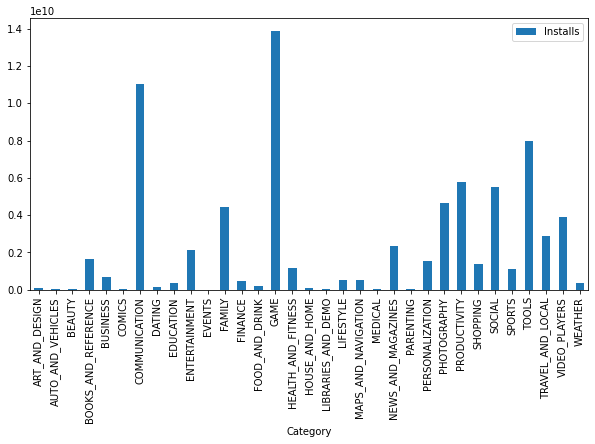

In [ ]:
category_install.plot(x='Category',y='Installs',figsize=(10,5),kind='bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


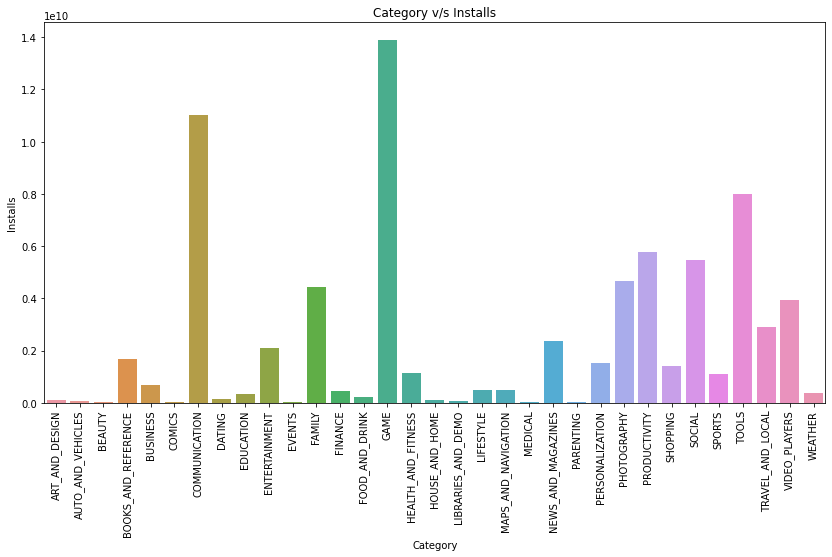

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel('Categories')
plt.ylabel('Number of Installs')
plt.title('Category v/s Installs')
plt.xticks(rotation=90)
sns.barplot(category_install.Category,category_install.Installs)
plt.show()

Which are the apps with highest number of reviews?


In [ ]:
app_reviews=df[['App','Reviews']].sort_values('Reviews',ascending=False).reset_index(drop=True).head(20)
app_reviews

,App,Reviews
0,Facebook,78158306.0
1,WhatsApp Messenger,69119316.0
2,Instagram,66577313.0
3,Messenger – Text and Video Chat for Free,56642847.0
4,Clash of Clans,44891723.0
5,Clean Master- Space Cleaner & Antivirus,42916526.0
6,Subway Surfers,27722264.0
7,YouTube,25655305.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
9,Clash Royale,23133508.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


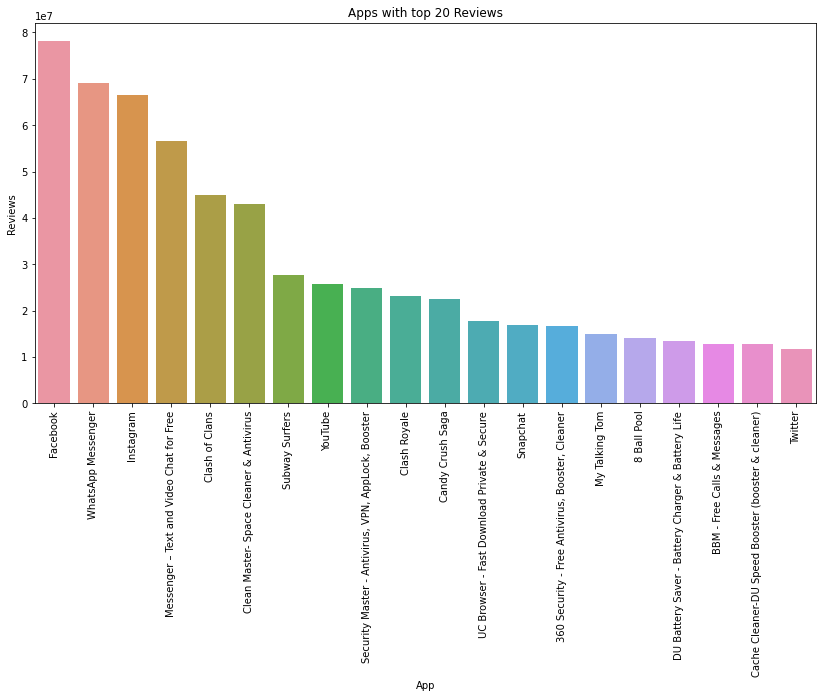

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.title('Apps with top 20 Reviews')
plt.xticks(rotation=90)
sns.barplot(app_reviews.App,app_reviews.Reviews)
plt.show()

What is the average rating of ap on playstore

In [ ]:
new_df=pd.DataFrame(df[df['Rating']==5.0][['App','Rating','Type']])
new_df[new_df['Type']=='Paid']


,App,Rating,Type
2262,Super Hearing Secret Voices Recorder PRO,5.0,Paid
2271,FHR 5-Tier 2.0,5.0,Paid
3957,ADS-B Driver,5.0,Paid
4452,P-Home for KLWP,5.0,Paid
4477,Android P Style Icon Pack,5.0,Paid
4988,Easy Hotspot Ad Free,5.0,Paid
5237,Hey AJ! It's Saturday!,5.0,Paid
5246,Hey AJ! It's Bedtime!,5.0,Paid
5260,AJ Gray Dark Icon Pack,5.0,Paid
5263,AJ Blue Icon Pack,5.0,Paid


Average rating of app on playstore

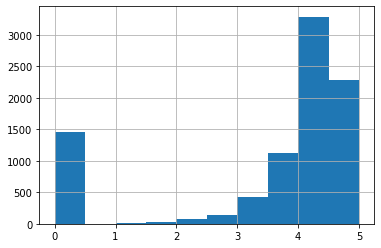

In [ ]:
df['Rating'].hist()

In [ ]:
print('avg mean is',np.mean(df['Rating']))

avg mean is 3.4769551969303687
